### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel

### Q1. What are the primary cultural values associated with trust in political institutions?

In [2]:
wave7_csv = "data/preprocessed/filtered_wave_7.csv"
df = pd.read_csv(wave7_csv, low_memory=False)

In [3]:
g8_codes = [840, 124, 250, 276, 380, 392, 643, 826]
df_g8 = df[df["Country"].isin(g8_codes)]

In [5]:
# Clean / Recode New Variables
valid_conf = [1,2,3,4]
valid_demo = list(range(1, 11))  # 1..10
valid_educ = list(range(0, 9))   # 0..8
valid_income = list(range(1, 11)) # 1..10

df_clean = df_g8[
    df_g8["C Government"].isin(valid_conf) &
    df_g8["C Armed forces"].isin(valid_conf) &
    df_g8["C Police"].isin(valid_conf) &
    df_g8["C Courts"].isin(valid_conf) &
    df_g8["C Political parties"].isin(valid_conf) &
    df_g8["C Civil services"].isin(valid_conf) &
    df_g8["C Television"].isin(valid_conf) &
    df_g8["C Elections"].isin(valid_conf) &
    df_g8["Importance of democracy"].isin(valid_demo) &
    df_g8["Highest educational level"].isin(valid_educ) &
    df_g8["Scale of incomes"].isin(valid_income) &
    (df_g8["Age"] > 0)  # Age must be positive
].copy()

# Now rename columns for convenience
df_clean = df_clean.rename(columns={
    "C Government": "gov_conf",
    "C Armed forces": "armed_conf",
    "C Television": "tv_conf",
    "C Police": "police_conf",
    "C Courts": "courts_conf",
    "C Political parties": "party_conf",
    "C Civil services": "civil_conf",
    "C Elections": "elect_conf",
    "Importance of democracy": "demo_import",
    "Highest educational level": "educ_level",
    "Scale of incomes": "income_scale"
})


In [6]:
# Optionally Scale Only Certain Variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean["Age_scaled"] = scaler.fit_transform(df_clean[["Age"]])
df_clean["demo_import_scaled"] = scaler.fit_transform(df_clean[["demo_import"]])


In [7]:
df_usa = df_clean[df_clean["Country"] == 840].copy()
print("Number of rows for USA:", len(df_usa))
df_usa.head()

Number of rows for USA: 2418


,Country,Year,armed_conf,tv_conf,police_conf,courts_conf,gov_conf,party_conf,civil_conf,elect_conf,...,educ_level,Age,income_scale,Sex,Strong Leader,Expert Non Govt Person,Signing a petition,Joining unofficial strikes,Age_scaled,demo_import_scaled
89769,840,2017,3,2,4,4,4,4,4,4,...,4,43,3,2,1,4,2,2,-0.263294,-3.461547
89770,840,2017,2,3,2,2,3,4,4,4,...,2,35,5,2,4,4,3,3,-0.726790,-1.891139
89771,840,2017,2,3,2,2,2,3,3,3,...,3,48,1,2,-1,-1,3,3,0.026391,-3.985016
89772,840,2017,2,3,2,2,4,4,3,4,...,3,49,1,2,4,3,1,3,0.084328,0.726208
89773,840,2017,2,3,2,2,4,4,4,3,...,3,20,5,2,2,2,2,3,-1.595846,-1.891139


In [8]:
# Fit an Ordered Logit Model
# Ordinal logistic approach with statsmodels
feature_cols = [
    "party_conf", "elect_conf", "armed_conf", "tv_conf",
    "police_conf", "courts_conf", "civil_conf",
    "demo_import", "educ_level", "Age", "income_scale"
]

# Drop any row with NA in these columns (just in case)
df_model = df_clean.dropna(subset=["gov_conf"] + feature_cols)

y = df_model["gov_conf"]  # This must be an integer-coded ordinal
X = df_model[feature_cols]

# Build an OrderedModel with a logit (or probit) link
mod = OrderedModel(
    endog = y,
    exog = X,
    distr = 'logit'  # or 'probit'
)

res = mod.fit(method='bfgs', disp=False)  # bfgs or newton
print(res.summary())


                             OrderedModel Results                             
Dep. Variable:               gov_conf   Log-Likelihood:                -11155.
Model:                   OrderedModel   AIC:                         2.234e+04
Method:            Maximum Likelihood   BIC:                         2.244e+04
Date:                Sun, 26 Jan 2025                                         
Time:                        19:11:21                                         
No. Observations:               11668                                         
Df Residuals:                   11654                                         
Df Model:                          11                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
party_conf       1.4209      0.036     39.251      0.000       1.350       1.492
elect_conf       0.4770      0.028     17.136 

In [9]:
df_usa = df_g8_clean[df_g8_clean["Country"] == 840].copy()
print("Number of rows for USA:", len(df_usa))
df_usa.head()


NameError: name 'df_g8_clean' is not defined

In [10]:
df_usa = df_usa.rename(columns={
    "C Government": "gov_conf",        # Dependent variable
    "C Political parties": "party_conf",
    "C Elections": "elect_conf",
    "C Armed forces": "armed_conf",
    "C Television": "tv_conf",
    "C Police": "police_conf",
    "C Courts": "courts_conf",
    "C Civil services": "civil_conf",
    "Importance of democracy": "demo_import"
})


In [11]:
df_usa.head()


,Country,Year,armed_conf,tv_conf,police_conf,courts_conf,gov_conf,party_conf,civil_conf,elect_conf,...,educ_level,Age,income_scale,Sex,Strong Leader,Expert Non Govt Person,Signing a petition,Joining unofficial strikes,Age_scaled,demo_import_scaled
89769,840,2017,3,2,4,4,4,4,4,4,...,4,43,3,2,1,4,2,2,-0.263294,-3.461547
89770,840,2017,2,3,2,2,3,4,4,4,...,2,35,5,2,4,4,3,3,-0.726790,-1.891139
89771,840,2017,2,3,2,2,2,3,3,3,...,3,48,1,2,-1,-1,3,3,0.026391,-3.985016
89772,840,2017,2,3,2,2,4,4,3,4,...,3,49,1,2,4,3,1,3,0.084328,0.726208
89773,840,2017,2,3,2,2,4,4,4,3,...,3,20,5,2,2,2,2,3,-1.595846,-1.891139


In [12]:
# Confidence in Government
print("Confidence in Government:")
print(df_usa["gov_conf"].value_counts())

# Confidence in Political Parties
print("\nConfidence in Political Parties:")
print(df_usa["party_conf"].value_counts())

# Importance of democracy
print("\nImportance of democracy:")
print(df_usa["demo_import"].value_counts())


Confidence in Government:
gov_conf
3    937
4    740
2    569
1    172
Name: count, dtype: int64

Confidence in Political Parties:
party_conf
3    1534
4     639
2     211
1      34
Name: count, dtype: int64

Importance of democracy:
demo_import
10    1201
8      309
5      289
9      259
7      141
6      112
4       42
1       28
3       21
2       16
Name: count, dtype: int64


In [13]:
print("\nMean of Confidence in Government (lower is more confident):",
      df_usa["gov_conf"].mean())

print("Median of Confidence in Government:",
      df_usa["gov_conf"].median())



Mean of Confidence in Government (lower is more confident): 2.9284532671629444
Median of Confidence in Government: 3.0


             gov_conf  party_conf  elect_conf  armed_conf   tv_conf  \
gov_conf     1.000000    0.347024    0.299821    0.430722 -0.010396   
party_conf   0.347024    1.000000    0.372010    0.183029  0.324425   
elect_conf   0.299821    0.372010    1.000000    0.241182  0.252057   
armed_conf   0.430722    0.183029    0.241182    1.000000  0.129135   
tv_conf     -0.010396    0.324425    0.252057    0.129135  1.000000   
police_conf  0.440104    0.232077    0.328915    0.531430  0.152570   
courts_conf  0.245968    0.282741    0.419562    0.302723  0.298343   
civil_conf   0.166914    0.399700    0.426792    0.213365  0.282669   
demo_import  0.043130    0.012988   -0.219401   -0.114042 -0.048759   

             police_conf  courts_conf  civil_conf  demo_import  
gov_conf        0.440104     0.245968    0.166914     0.043130  
party_conf      0.232077     0.282741    0.399700     0.012988  
elect_conf      0.328915     0.419562    0.426792    -0.219401  
armed_conf      0.531430     

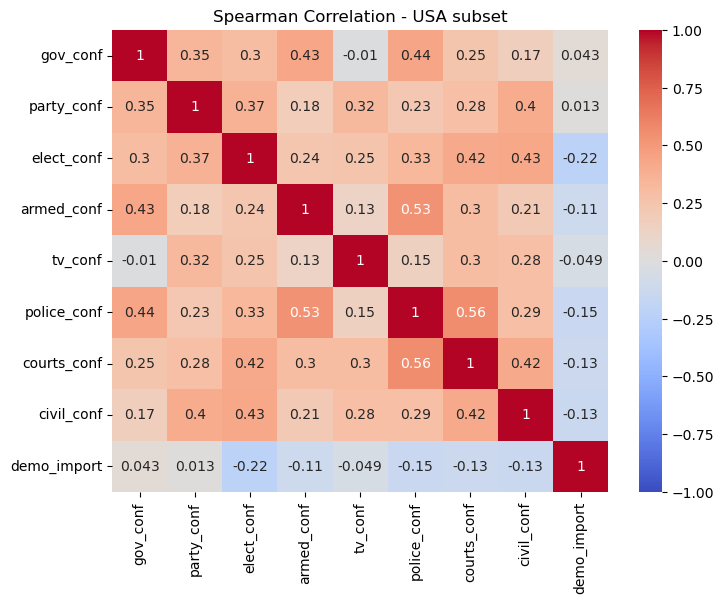

In [15]:
# Subset the columns for correlation
cols_of_interest = [
    "gov_conf",
    "party_conf",
    "elect_conf",
    "armed_conf",
    "tv_conf",
    "police_conf",
    "courts_conf",
    "civil_conf",
    "demo_import",
]

corr_matrix = df_usa[cols_of_interest].corr(method="spearman")
print(corr_matrix)

# Optional: visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation - USA subset")
plt.show()


In [16]:
import statsmodels.formula.api as smf

# Define the formula: gov_conf ~ all other columns
formula_all = (
    "gov_conf ~ party_conf + elect_conf + armed_conf + tv_conf "
    "+ police_conf + courts_conf + civil_conf + demo_import"
)

model_all = smf.ols(formula_all, data=df_usa).fit()
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:               gov_conf   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     168.9
Date:                Sun, 26 Jan 2025   Prob (F-statistic):          1.66e-226
Time:                        19:11:58   Log-Likelihood:                -2653.9
No. Observations:                2418   AIC:                             5326.
Df Residuals:                    2409   BIC:                             5378.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5446      0.115      4.744      

### Q2. How does trust in political institutions compare across countries?

In [94]:
wave7_csv = "data/preprocessed/filtered_wave_7.csv"
wave7_q2 = pd.read_csv(wave7_csv, low_memory=False)

### Q3. How has trust in political institutions evolved from 2017 to 2022 and over the entire time span?

### BONUS